# SAMPLE

In [1]:
import numpy as np
import pandas as pd
import sqlite3

import plotnine as p9
from mizani.breaks import date_breaks
from mizani.formatters import date_format, dollar_format

from ipynb.fs.defs.market_4_rank import (
    get_carg_histories,
    get_quantile_histories,
    get_tail,
    get_rank_histories)

from ipynb.fs.defs.market_5_trade import trade

### GET PRICE HISTORIES

In [2]:
con = sqlite3.connect('market.db')

price_histories = (
    pd.read_sql('SELECT * FROM sp5_close_histories', con, parse_dates=['Date'])
    .pivot(index='Date', columns='Symbol', values='Close'))

# display(close_histories)

### SAMPLE
Drop random symbols.

In [3]:
def get_sample(df, frac):
    return df.sample(frac=frac, axis=1)


def get_balance_histories(price_histories, quantile_histories, frac, num_trials):
    balance_histories = pd.DataFrame()
    for i in range(num_trials):
        sample_histories = get_sample(quantile_histories, frac)
        rank_histories = get_rank_histories(sample_histories)
         
        trial = f'{i:03}'
        balance_history, _ = trade(price_histories, rank_histories)
        balance_histories[trial] = balance_history
        print(trial, end=' ')
    
    return balance_histories.rename_axis(index='Date', columns='Trial')


def get_cargs(df):
    ratio = df.iloc[-1]/df.iloc[0] 
    return 100*(ratio**(252/len(df)) - 1).rename('CARG')

In [4]:
carg_days = 63
q_days = 252
q = 0.75
tail_days = 2*252
frac = 0.75

carg_histories = get_carg_histories(price_histories, carg_days)
quantile_histories = get_quantile_histories(carg_histories, q_days, q)
tail_histories = get_tail(quantile_histories, tail_days)
sample_histories = get_sample(tail_histories, frac)
rank_histories = get_rank_histories(sample_histories)
balance_history, _ = trade(price_histories, rank_histories)

# display(balance_history)

In [5]:
carg_days = 63
q_days = 252
q = 0.75
tail_days = 2*252
frac = 0.75
num_trials = 5

carg_histories = get_carg_histories(price_histories, carg_days)
quantile_histories = get_quantile_histories(carg_histories, q_days, q)
tail_histories = get_tail(quantile_histories, tail_days)

balance_histories = get_balance_histories(
    price_histories, tail_histories, frac, num_trials)

display(balance_histories)

000 001 002 003 004 

Trial,000,001,002,003,004
Date,,,,,
2020-05-15,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
2020-05-18,5316.352970,5380.455952,5295.895576,5333.239033,5199.747231
2020-05-19,5312.657755,5385.474489,5276.174519,5284.471323,5201.051212
2020-05-20,5419.863247,5512.302219,5365.706150,5426.359081,5301.472797
2020-05-21,5301.068035,5433.659260,5221.248226,5378.324886,5251.543865
...,...,...,...,...,...
2022-05-09,12292.699387,15388.843112,12524.372564,16465.855121,15362.725617
2022-05-10,12385.278957,15518.738062,12732.919102,16702.728863,15506.942426
2022-05-11,12203.588749,15319.247862,12737.252823,16525.658691,15413.312190


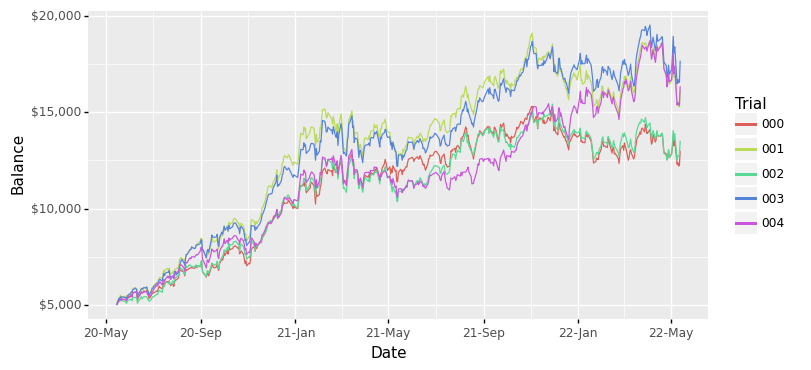

<ggplot: (8766746658636)>

In [6]:
df = (balance_histories
    .reset_index()
    .melt(id_vars='Date', value_name='Balance'))

p = (p9.ggplot(data=df, mapping=p9.aes(x='Date', y='Balance', color='Trial'))
    + p9.theme(figure_size=(8, 4))
    + p9.scale_x_datetime(breaks=date_breaks('4 months'), labels=date_format('%y-%b'))
    + p9.geom_line(alpha=1.00)
    + p9.scale_y_continuous(labels=dollar_format(prefix='$', digits=0, big_mark=',')))

display(p)

In [7]:
carg_days = 63
q_days = 252
q = 0.75
tail_days = 2*252
frac = 0.75
num_trials = 1_000

carg_histories = get_carg_histories(price_histories, carg_days)
quantile_histories = get_quantile_histories(carg_histories, q_days, q)
tail_histories = get_tail(quantile_histories, tail_days)

balance_histories = get_balance_histories(
    price_histories, tail_histories, frac, num_trials)

# display(balance_histories)

000 001 002 003 004 005 006 007 008 009 010 011 012 013 014 015 016 017 018 019 020 021 022 023 024 025 026 027 028 029 030 031 032 033 034 035 036 037 038 039 040 041 042 043 044 045 046 047 048 049 050 051 052 053 054 055 056 057 058 059 060 061 062 063 064 065 066 067 068 069 070 071 072 073 074 075 076 077 078 079 080 081 082 083 084 085 086 087 088 089 090 091 092 093 094 095 096 097 098 099 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 

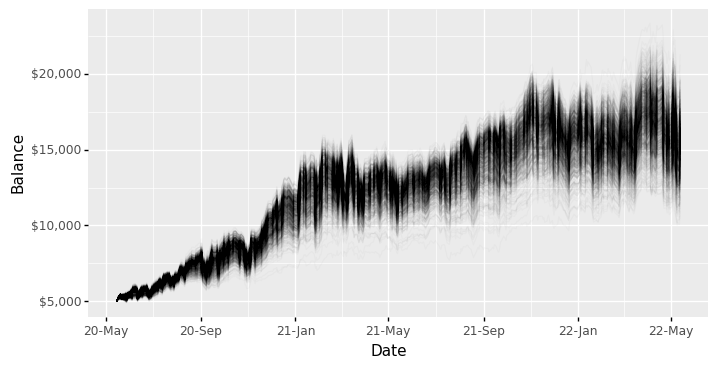

<ggplot: (8766873601603)>

In [8]:
df = (balance_histories
    .reset_index()
    .melt(id_vars='Date', value_name='Balance'))

p = (p9.ggplot(data=df, mapping=p9.aes(x='Date', y='Balance', group='Trial'))
    + p9.theme(figure_size=(8, 4))
    + p9.scale_x_datetime(breaks=date_breaks('4 months'), labels=date_format('%y-%b'))
    + p9.geom_line(alpha=0.02)
    + p9.scale_y_continuous(labels=dollar_format(prefix='$', digits=0, big_mark=',')))

display(p)

In [9]:
cargs = get_cargs(balance_histories)

display(cargs)

Trial
000    73.535764
001    78.687689
002    81.409247
003    66.553945
004    83.481628
         ...    
995    77.324737
996    83.963288
997    63.644132
998    74.056367
999    55.059941
Name: CARG, Length: 1000, dtype: float64

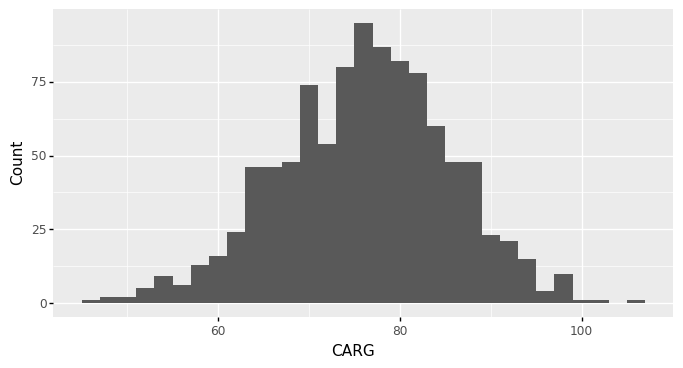

<ggplot: (8766778415255)>

In [10]:
df = cargs.reset_index()

p = (p9.ggplot(data=df, mapping=p9.aes(x='CARG'))
    + p9.theme(figure_size=(8, 4))
    + p9.geom_histogram(binwidth=2)
    + p9.ylab('Count'))

display(p)